In [1]:
import math
import numpy as np
import pandas as pd
from numba import njit
from numba import jit
!python -m pip install yfinance
import yfinance as yf
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plot_width = 15
plot_length = 3
short_lookback = 5
long_lookback = 10

In [3]:
extract_obj = yf.Ticker("JPM")
data = extract_obj.history(period="1y")
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close']) / 3).round(2)
data = data.iloc[-50:]
price_list = np.array(data['Typical Price'])

In [4]:
#price_list - numpy array list
#lookback - integer
def wma(price_array, lookback):
    out_array = np.array([None for i in range(lookback)])
    for i in range(price_array.size - lookback):
        in_array = (price_array[i:i+lookback])
        sum_val = 0
        for j in range(lookback):
            sum_val += in_array[j]*(j+1)
        out_val = sum_val*2/(lookback*(lookback+1))
        out_array = np.append(out_array,out_val)
    return out_array


In [5]:
start = time.time()
x1 = wma(price_list,short_lookback)
x2 = wma(price_list,long_lookback)
end = time.time()
print(x1)
function_time = end - start

[None None None None None 155.18866666666665 154.62533333333334 153.464
 151.986 151.06666666666666 150.532 151.38466666666667 151.596
 152.51533333333333 152.5353333333333 152.464 152.83333333333334
 152.90866666666668 153.35733333333334 153.79066666666665
 154.67000000000002 155.33733333333333 155.052 154.05866666666668 152.964
 152.83133333333333 152.67866666666666 151.73866666666666
 150.87333333333333 149.85333333333335 149.37133333333333
 149.76333333333335 150.22466666666665 151.00999999999996
 152.4013333333333 153.11266666666668 153.60199999999998
 154.04399999999998 155.20666666666665 156.7926666666667
 158.16533333333334 159.828 160.16866666666664 159.74666666666664
 159.95466666666664 161.0773333333333 162.196 162.89733333333334
 162.33533333333332 161.79066666666668]


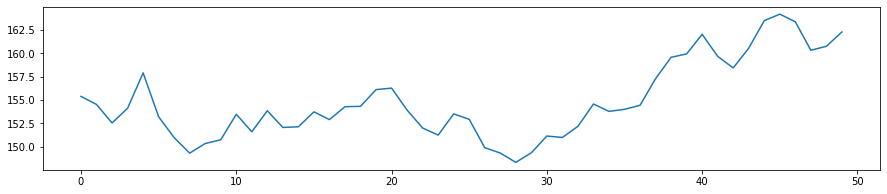

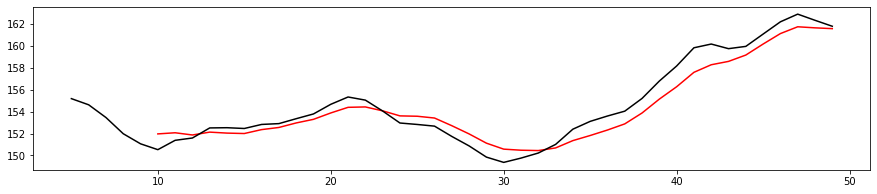

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')
plt.show()

In [7]:
def wma_wma_osc_gen(price_array, short_lookback, long_lookback):
    out_array = np.array([None for i in range(long_lookback)])    
    def wma(price_array, lookback):
        out_array = np.array([None for i in range(lookback)])
        for i in range(price_array.size - lookback):
            in_array = (price_array[i:i+lookback])
            sum_val = 0
            for j in range(lookback):
                sum_val += in_array[j]*(j+1)
            out_val = sum_val*2/(lookback*(lookback+1))
            out_array = np.append(out_array,out_val)
        return out_array
    out_arr = np.subtract(wma(price_array, short_lookback)[long_lookback:], wma(price_array, long_lookback)[long_lookback:])
    out_array = np.append(out_array,out_arr)
    return out_array

In [8]:
start = time.time()
osc = wma_wma_osc_gen(price_array = price_list, short_lookback = short_lookback, long_lookback = long_lookback)
end = time.time()
print(osc)
oscillator_time = (end-start)

[None None None None None None None None None None -1.4381818181818176
 -0.688969696969707 -0.2758181818181811 0.38315151515149637
 0.4920606060605621 0.4596363636363776 0.47206060606060873
 0.35103030303031346 0.3875151515151174 0.4917575757575605
 0.7889090909091294 0.9426060606060389 0.6218181818181847
 -0.015696969696961105 -0.6499999999999773 -0.7499393939393713
 -0.7393333333333487 -0.9796969696969882 -1.094484848484825
 -1.2723030303030214 -1.2084848484848578 -0.7190303030302516
 -0.22624242424245722 0.32090909090905484 1.0427878787878626
 1.2888484848485007 1.2778181818181622 1.1607272727272857
 1.328484848484834 1.6479393939394242 1.8931515151515441
 2.2389090909090896 1.8897575757575567 1.1612121212120883
 0.7908484848484534 0.9093333333333078 1.0730909090909222
 1.1538787878787957 0.6884242424242473 0.21739393939392926]


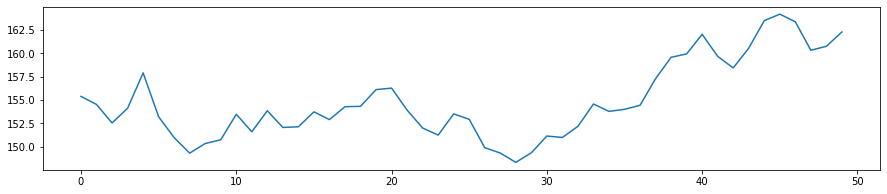

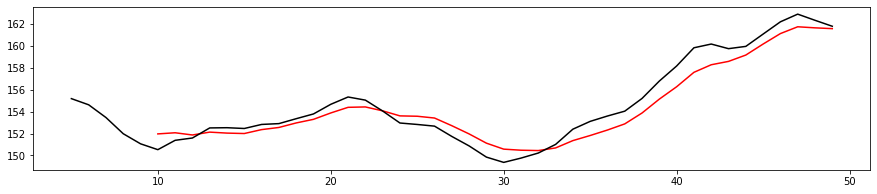

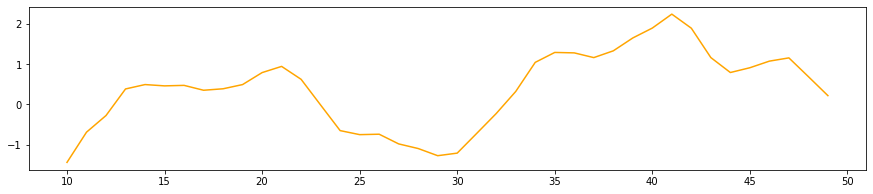

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(osc.size), osc, color = 'orange')
plt.show()

In [10]:
def signal_generation(oscillator_array, long_lookback):
    out_array = np.array([0 for i in range(long_lookback + 1)])
    start_val = long_lookback + 1
    for i in range(start_val, oscillator_array.size):
        append_val = 0
        if (oscillator_array[i] > 0 and oscillator_array[i - 1]  <= 0):
            append_val = oscillator_array[i] - oscillator_array[i - 1]
        elif (oscillator_array[i] < 0 and oscillator_array[i - 1]  >= 0):
            append_val = oscillator_array[i] - oscillator_array[i - 1]
        out_array = np.append(out_array, append_val)
    return out_array

In [11]:
start = time.time()
sign_gen = signal_generation(oscillator_array = osc, long_lookback = long_lookback)
end = time.time()
print(sign_gen)
signal_time = end - start

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.6589697   0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.63751515
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.54715152  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


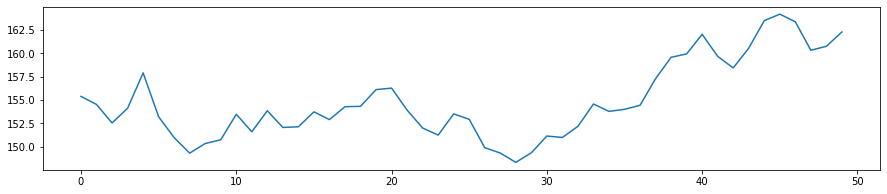

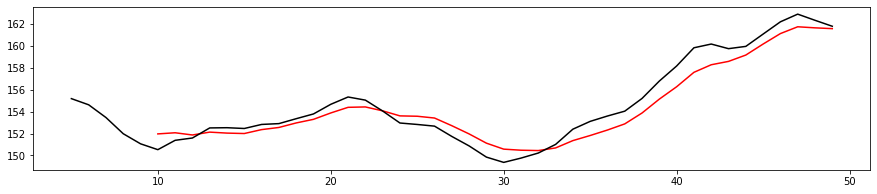

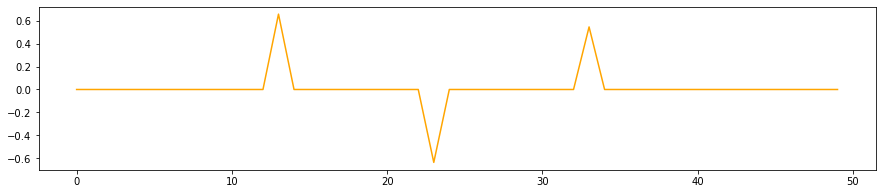

In [12]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

plt.show()

In [13]:
def signum_generation(signal_array, sensitivity = 1.5):
    out_arr = np.empty(0)
    std = np.std(signal_array)
    for i in signal_array:
        append_val = 0
        if (i > std*sensitivity):
            append_val = 100
        elif (i < -std*sensitivity):
            append_val = -100
        out_arr = np.append(out_arr, append_val)
    return out_arr

In [14]:
start = time.time()
signum_gen = signum_generation(sign_gen)
end = time.time()
print(signum_gen)
signum_time = end - start

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.  100.    0.    0.    0.    0.    0.    0.    0.    0.    0. -100.
    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.]


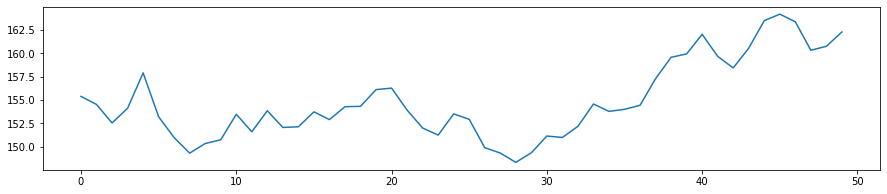

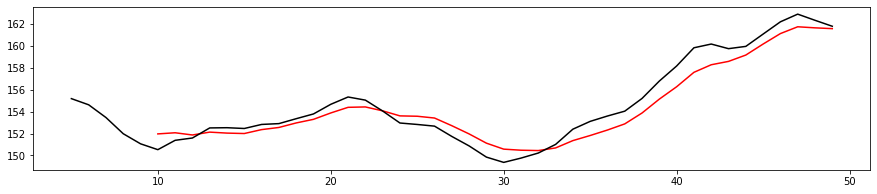

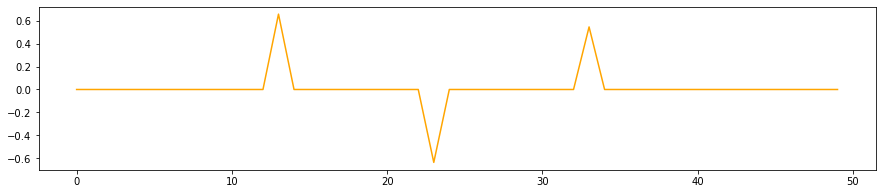

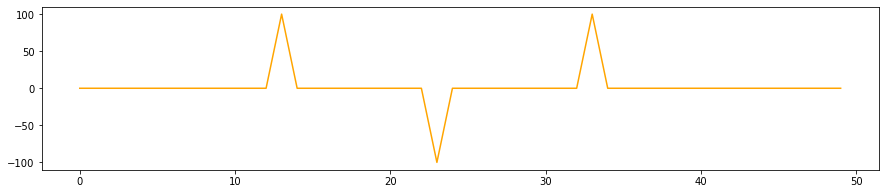

In [15]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

plt.show()

In [16]:
def current_bias(signal_array, signum_array):
    bias = 0
    bias_list = []
    for i,j in zip(signal_array,signum_array):
        if (bias == 0):
            if (j == 100):
                bias = 100
            elif(j == -100):
                bias = -100
        elif(bias == -100):
            if (j == 100 and i > 0):
                bias = 100
            elif(j != 100 and i > 0):
                bias = 0
        elif(bias == 100):
            if (j == -100 and i < 0):
                bias = -100
            elif (j != -100 and i < 0):
                bias = 0
        bias_list.append(bias)
    bias_array = np.array(bias_list)
    return bias_array

In [17]:
start = time.time()
bias_array = current_bias(signal_array = sign_gen, signum_array = signum_gen)
end = time.time()
bias_time = end - start
print(bias_array)

[   0    0    0    0    0    0    0    0    0    0    0    0    0  100
  100  100  100  100  100  100  100  100  100 -100 -100 -100 -100 -100
 -100 -100 -100 -100 -100  100  100  100  100  100  100  100  100  100
  100  100  100  100  100  100  100  100]


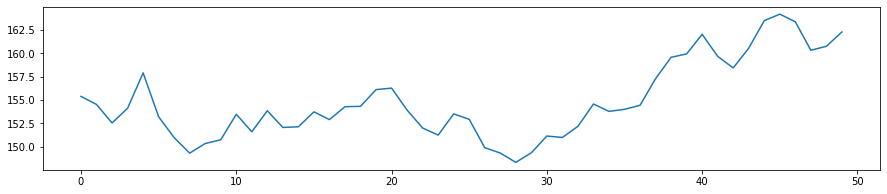

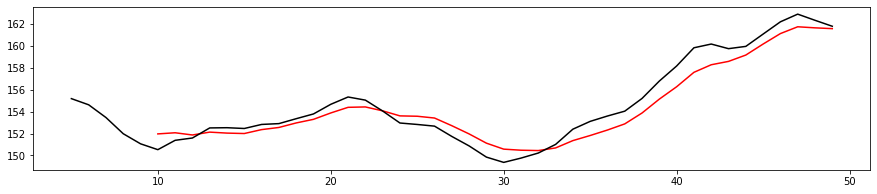

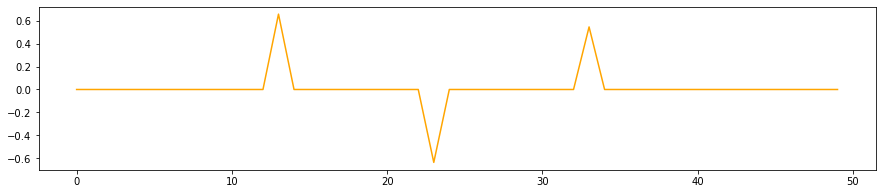

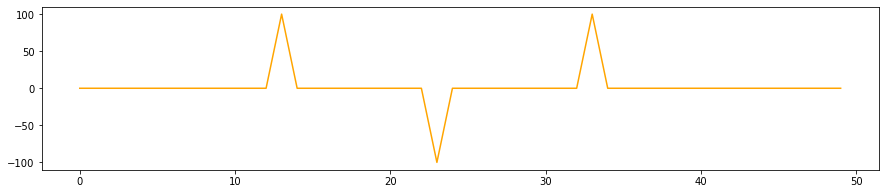

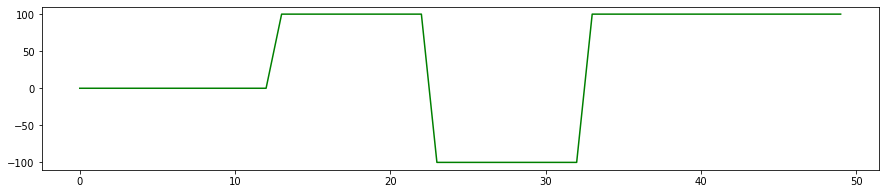

In [18]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

plt.show()

In [19]:
def efficacy_generator (price_array,signum_array, bias_array, stop_loss_percent = 0.3):
    long_book = [0 for i in range(price_array.size)]
    short_book = [0 for i in range(price_array.size)]
    long_pos = []
    short_pos = []
    long_positions = []
    short_positions = []
    long_cash = 0
    short_cash = 0
    stop_loss_flag = False
    short_position_flag = False
    long_position_flag = False
    sub_stop = (max(price_array) - min(price_array))*stop_loss_percent
    
    ctr = 0
    for i,j,k in zip(price_array, bias_array,signum_array):
        if (stop_loss_flag):
            if(k == 100 or k == -100):
                stop_loss_flag = False                 
        elif (stop_loss_flag == False  and short_position_flag == False and long_position_flag == False):
            if(j == 100):
                long_position_flag = True
                long_pos.append(i)
                long_book[ctr] = i
            elif(j == -100):
                short_position_flag = True
                short_pos.append(i)
                short_book[ctr] = i
        elif(stop_loss_flag == False  and short_position_flag == True):
            short_pos.append(i)
            short_book[ctr] = i
            if (i > (min(short_pos) + sub_stop)):
                short_position_flag = False
                stop_loss_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 100):
                short_position_flag = False
                long_position_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 0):
                short_position_flag = False
                short_positions.append(short_pos)
                short_pos = []
        elif(stop_loss_flag == False and long_position_flag == True):
            long_pos.append(i)
            long_book[ctr] = i
            if (i < (max(long_pos) - sub_stop)):
                long_position_flag = False
                stop_loss_flag = True
                long_positions.append(long_pos)
                long_pos = []
            elif (j == 0):
                long_position_flag = False
                long_positions.append(long_pos)
                long_pos = []
            elif(j == -100):
                long_position_flag = False
                short_position_flag = True
                long_positions.append(long_pos)
                long_pos = []
                
        ctr += 1
        
    if (long_pos != []):
        long_positions.append(long_pos)
    if (short_pos != []):
        short_positions.append(short_pos)
        
    for i in long_positions:
        long_cash += (i[-1] - i[0])
    for i in short_positions:
        short_cash += (i[0] - i[-1])
    
    out = (long_cash+short_cash)/sub_stop
    print(out)
    return long_book,short_book

In [20]:
start = time.time()
test = efficacy_generator(price_array = price_list, signum_array = signum_gen, bias_array = bias_array)
end = time.time()
efficacy_time = end - start
print(test)

1.6131064902331393
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 152.05, 152.12, 153.72, 152.89, 154.27, 154.31, 156.1, 156.26, 153.91, 151.99, 151.23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 153.77, 153.99, 154.42, 157.27, 159.56, 159.92, 162.02, 159.66, 158.42, 160.54, 163.48, 164.18, 163.36, 160.31, 160.74, 162.27], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


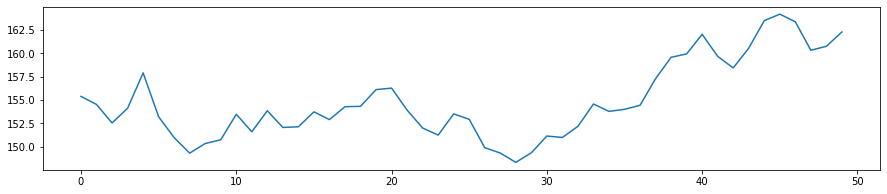

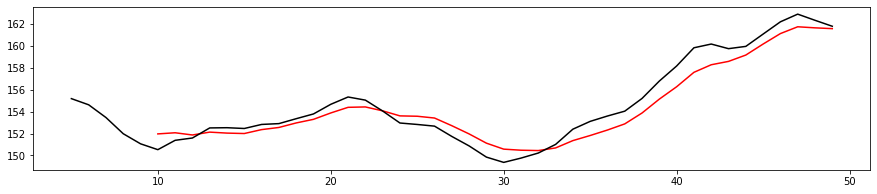

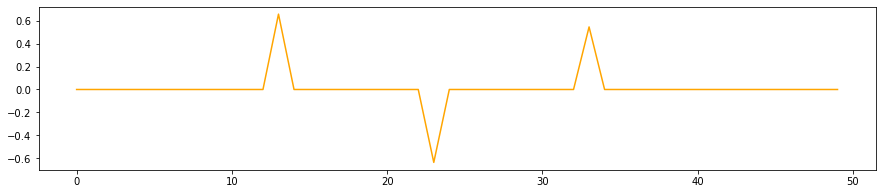

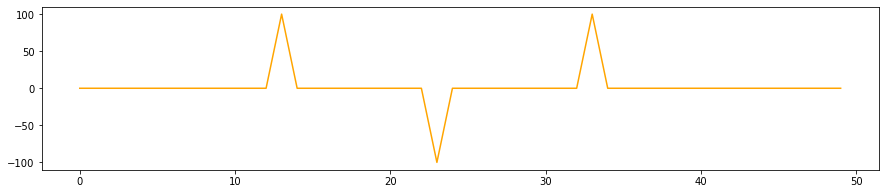

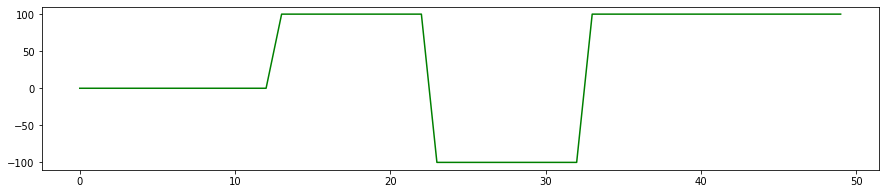

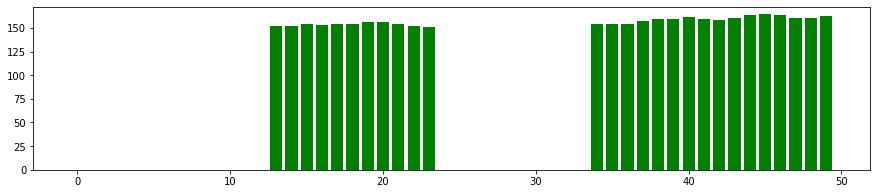

In [21]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

figure(figsize=(plot_width, plot_length))
ax6 = plt.subplot()
plt.bar(np.arange(bias_array.size), test[0], color = 'green')
plt.bar(np.arange(bias_array.size), test[1], color = 'red')

plt.show()

In [22]:
print(
    "Diagnostics \n" +
    "Function Load Time: " + str(function_time) + "\n" + 
    "Oscillator Load Time: " + str(oscillator_time) + "\n" + 
    "Signal Load Time: " + str(signal_time) + "\n" + 
    "Signum Load Time: " + str(signum_time) + "\n" 
    "Bias Load Time: " + str(bias_time) + "\n" + 
    "Efficacy Value Load time: " + str(efficacy_time) + "\n"
    "Total Time: " + str(function_time+oscillator_time+signal_time+signum_time+bias_time+efficacy_time)
    )

Diagnostics 
Function Load Time: 0.005994319915771484
Oscillator Load Time: 0.010003328323364258
Signal Load Time: 0.001996755599975586
Signum Load Time: 0.004998445510864258
Bias Load Time: 0.0
Efficacy Value Load time: 0.001001119613647461
Total Time: 0.023993968963623047
